In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Inside The U.S. Political Donation History Of Wealthy Sports Owners (2016-2020)

### Task Details
American professional sports owners have contributed nearly $47 million in federal elections since 2015, according to research by ESPN in partnership with FiveThirtyEight, including $10 million to Republican causes and $1.9 million to Democratic causes so far in the 2020 election cycle.

Expected Submission
The sports-political-donations.csv contains every confirmed partisan political contribution from team owners and commissioners in the NFL, NBA, WNBA, NHL, MLB, and NASCAR. Only contributions while owners were involved with the team are included. The data is from the Federal Election Commission and OpenSecrets.

Evaluation
Questions that need to be answered:

1. Which Team, Team Owners, League made donations?

2. Average Donations made by each owner?

3. Which party received the maximum donations?

## Upvote is Free
#### If you like the notebook and found it informative please leave an upvote.

## Request
#### If you find that there are mistakes and there is room for furthur improvement, feel free to let me know.

## Importing the modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data 

In [3]:
df = pd.read_csv("sports-political-donations.csv")
df.head()

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat


## Let's make sure that the Data is clean

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   object
 5   Election Year  2798 non-null   int64 
 6   Party          2789 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.1+ KB


#### Looks like there are 9 missing values in the Party column. Let's drop those rows

In [5]:
df = df.dropna(axis=0)
df.isnull().sum()

Owner            0
Team             0
League           0
Recipient        0
Amount           0
Election Year    0
Party            0
dtype: int64

## It looks like the data is free from NaN Values

In [6]:
#Let's take a look at the amount column
df['Amount']

0       $4,000 
1       $2,800 
2       $2,700 
3       $2,700 
4       $2,700 
         ...   
2793    $2,700 
2794    $2,700 
2795    $2,700 
2796    $2,700 
2797    $2,700 
Name: Amount, Length: 2789, dtype: object

## It looks like the **Amount** column is in the object dtype. Let's convert it into int by striping it of '$' and ','

In [7]:
df['Amount'] = df['Amount'].str.replace(r'[\$,]', '').astype(int) #We're converting the 'Amounts' col from object to int
df['Amount'].dtype

<ipython-input-7-983fe1c5c328>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Amount'] = df['Amount'].str.replace(r'[\$,]', '').astype(int) #We're converting the 'Amounts' col from object to int


dtype('int32')

In [8]:
df['Amount']

0       4000
1       2800
2       2700
3       2700
4       2700
        ... 
2793    2700
2794    2700
2795    2700
2796    2700
2797    2700
Name: Amount, Length: 2789, dtype: int32

In [9]:
df.describe()

,Amount,Election Year
count,2.789000e+03,2789.000000
mean,1.653989e+04,2017.934027
std,7.767169e+04,1.603871
min,3.600000e+01,2016.000000
25%,2.700000e+03,2016.000000
50%,5.000000e+03,2018.000000
75%,5.600000e+03,2020.000000
max,1.850000e+06,2020.000000


## Time for some Exploratory Data Analysis

## Now Question no. 1

 #### Which Team, Team Owners, League made donations?

In [10]:
#Now let's find the top 10 donators 

donator_count = df.groupby('Owner').size().sort_values(ascending=False)
donator_count.head(10)
donator_count

Owner
Charles Johnson                     213
Micky Arison                        178
John Rogers                         149
Dan DeVos                           116
Jody Allen (Paul G. Allen Trust)    108
                                   ... 
Jon Ledecky                           1
Harvey Alter                          1
David A. Tepper                       1
Bobby Patton                          1
Neil Leibman                          1
Length: 158, dtype: int64

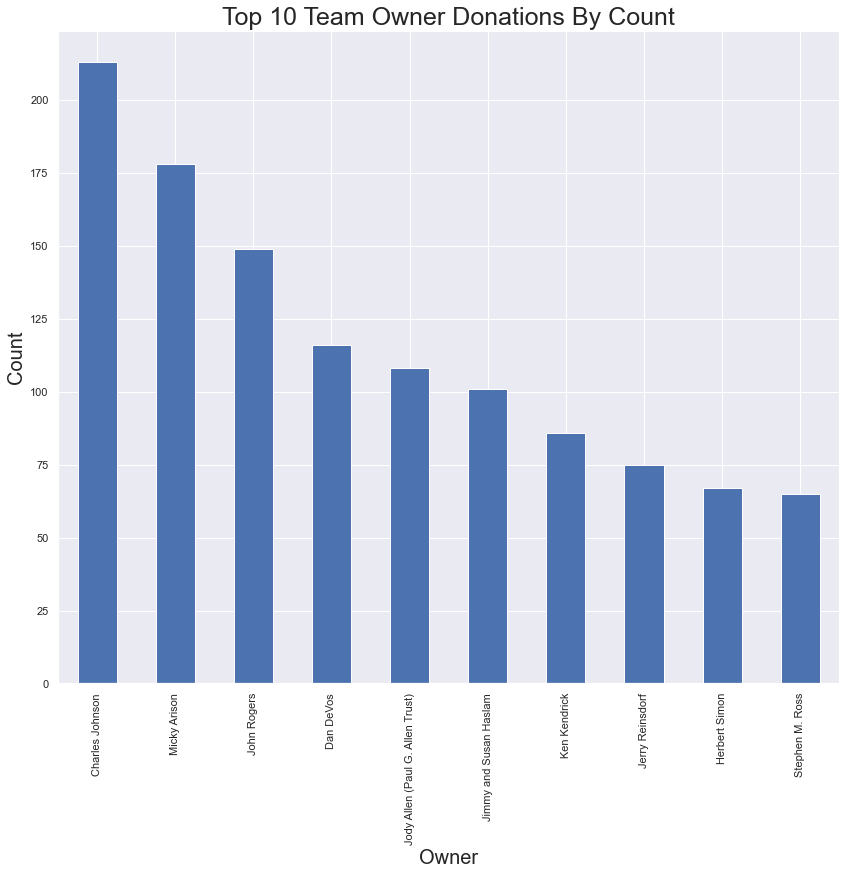

In [11]:
# Visualizing it
sns.set()
fig = plt.figure(figsize=(14,12))
donator_count[:10].plot(kind='bar')
plt.xlabel('Owner', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Top 10 Team Owner Donations By Count",fontsize=25);

### Individual League Donations

In [12]:
#Now let's do it with the League col

league_count = df.groupby('League').size().sort_values(ascending=False)
league_count

League
MLB               743
NBA               462
NFL               443
NHL               329
WNBA              274
NBA, WNBA         116
NBA, NFL          109
NBA, NHL          109
NBA, MLB           81
NASCAR             79
NBA, NHL, WNBA     15
NHL, NFL           12
MLB, NHL            7
MLB, WNBA           6
NBA, NFL, NHL       3
MLB, NASCAR         1
dtype: int64

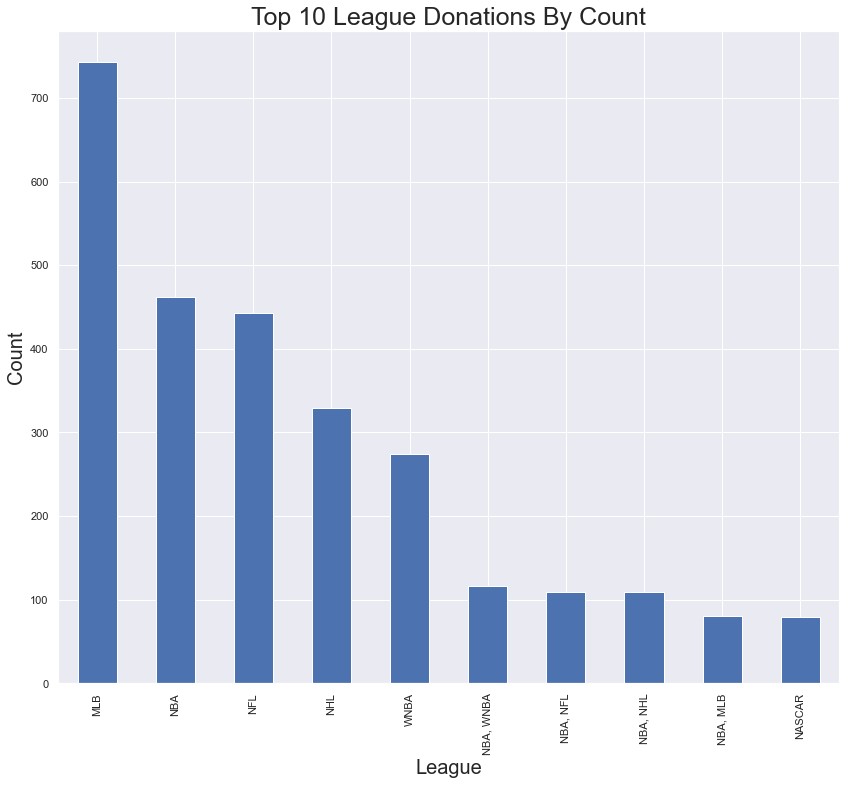

In [13]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(14,12))
league_count[:10].plot(kind='bar')
plt.xlabel('League', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Top 10 League Donations By Count",fontsize=25);

### Individual Team Donations

In [14]:
#Now for the individual teams
team_count = df.groupby('Team').size().sort_values(ascending=False)
team_count

Team
San Francisco Giants                        219
Chicago Sky                                 179
Miami Heat                                  178
Orlando Magic                               116
Portland Trail Blazers, Seattle Seahawks    108
                                           ... 
Premium Motorsports                           1
Baltimore Ravens                              1
Boston Celtics                                1
Boston Red Sox, Roush Fenway Racing           1
New York Yankees                              1
Length: 115, dtype: int64

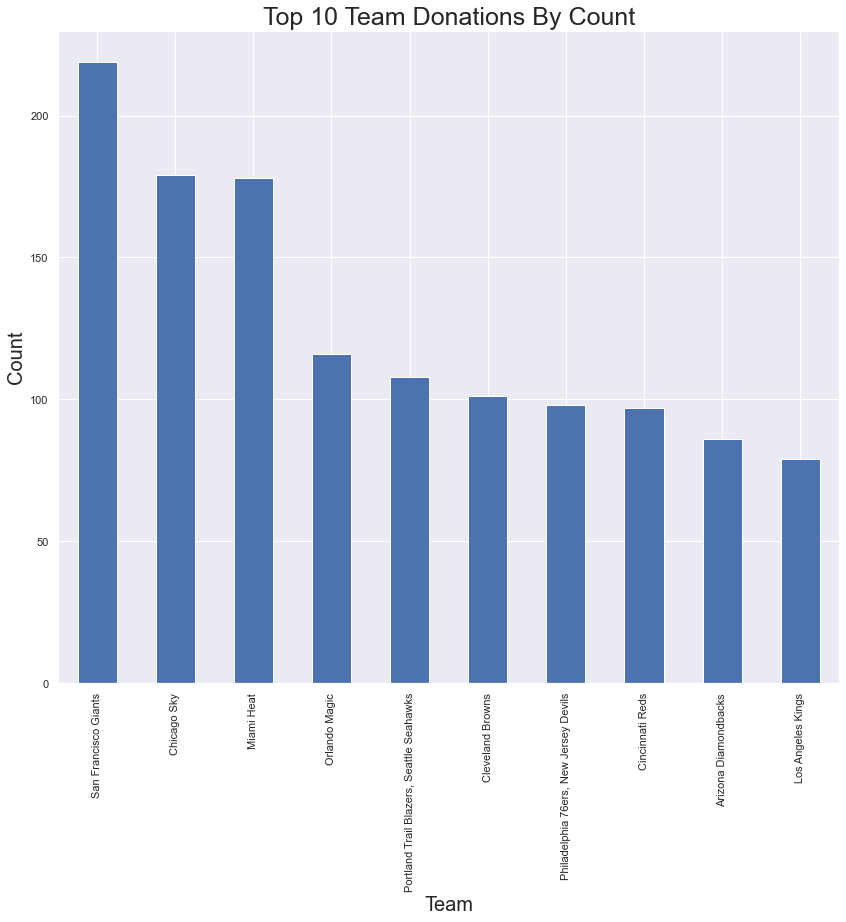

In [15]:
fig = plt.figure(figsize=(14,12))
team_count[:10].plot(kind='bar')
plt.xlabel('Team', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Top 10 Team Donations By Count",fontsize=25);

### Average Donations done by an Owner

In [16]:
avg_donators = df.groupby('Owner').mean()['Amount'].sort_values(ascending=False)
avg_donators

Owner
David A. Tepper      200000.000000
James L. Dolan       146363.636364
Peter Angelos        104638.600000
Janice S. McNair      97814.285714
Magic Johnson         96633.333333
                         ...      
Wyc Grousbeck           500.000000
Mary Kelly              498.333333
Jeff Dickerson          325.000000
Troy Stafford           250.000000
Jerry Bruckheimer       250.000000
Name: Amount, Length: 158, dtype: float64

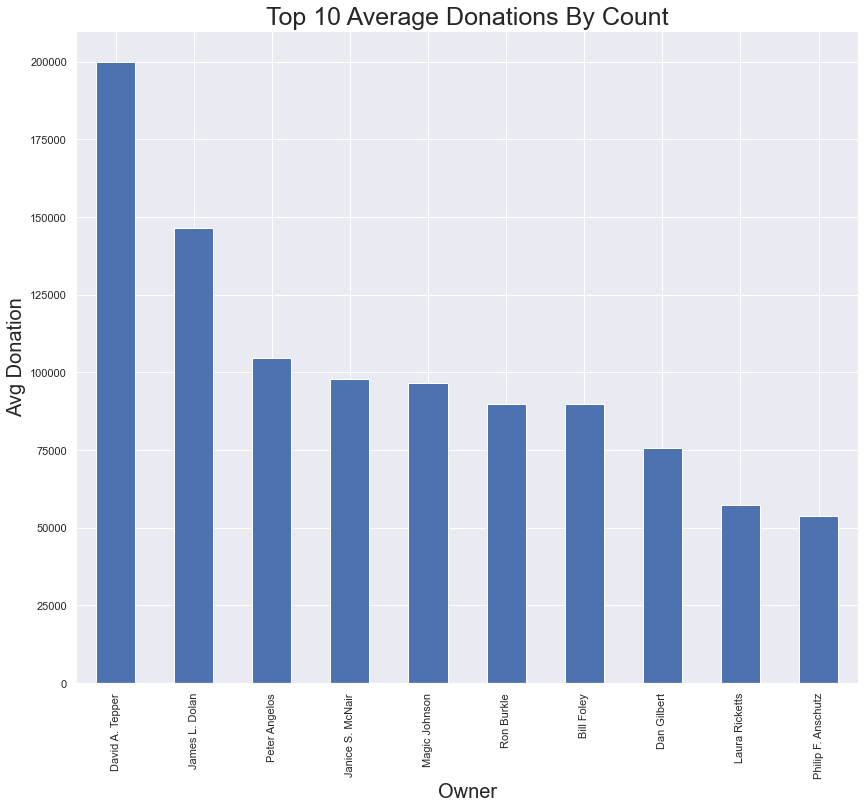

In [17]:
fig = plt.figure(figsize=(14,12))
avg_donators[:10].plot(kind='bar')
plt.xlabel('Owner', fontsize=20)
plt.ylabel("Avg Donation", fontsize=20)
plt.title("Top 10 Average Donations By Count",fontsize=25);

### Average Donations by League

In [18]:
avg_league = df.groupby('League').mean()['Amount'].sort_values(ascending=True)
avg_league

League
MLB, NASCAR        2700.000000
NBA, NFL           3876.146789
NBA, WNBA          6768.103448
WNBA               6875.700730
MLB, NHL           7500.000000
NASCAR             9220.164557
NBA, NHL, WNBA    10900.866667
NHL, NFL          10950.000000
NBA, MLB          12645.370370
NFL               13333.679458
NBA               14073.114719
NHL               19530.340426
NBA, NHL          19874.495413
MLB               26206.895020
NBA, NFL, NHL     49466.666667
MLB, WNBA         52483.333333
Name: Amount, dtype: float64

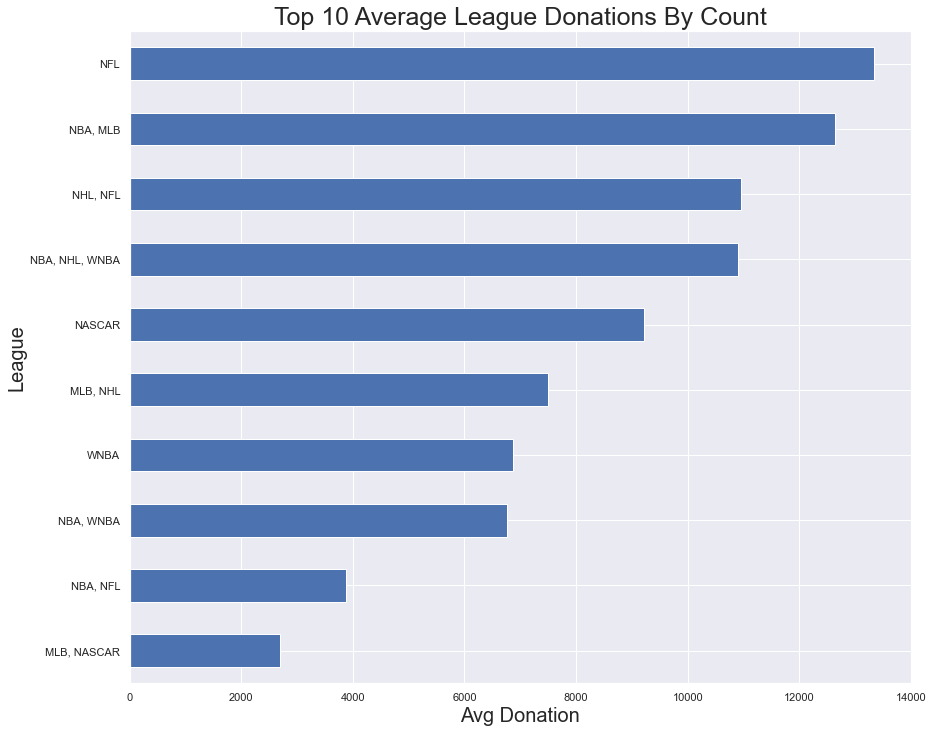

In [19]:
fig = plt.figure(figsize=(14,12))
avg_league[:10].plot(kind='barh')
plt.xlabel('Avg Donation', fontsize=20)
plt.ylabel("League", fontsize=20)
plt.title("Top 10 Average League Donations By Count",fontsize=25);

### Average Donations by Team

In [20]:
avg_team = df.groupby('Team').mean()['Amount'].sort_values(ascending=True)
avg_team

Team
Premium Motorsports                     250.000000
Spire Motorsports                       325.000000
Boston Celtics                          500.000000
Richard Petty Motorsports              1000.000000
Los Angeles Lakers                     1487.000000
                                         ...      
Vegas Golden Knights                  89927.272727
Pittsburgh Penguins                   89971.428571
Baltimore Orioles                    104638.600000
New York Knicks, New York Rangers    146363.636364
Carolina Panthers                    200000.000000
Name: Amount, Length: 115, dtype: float64

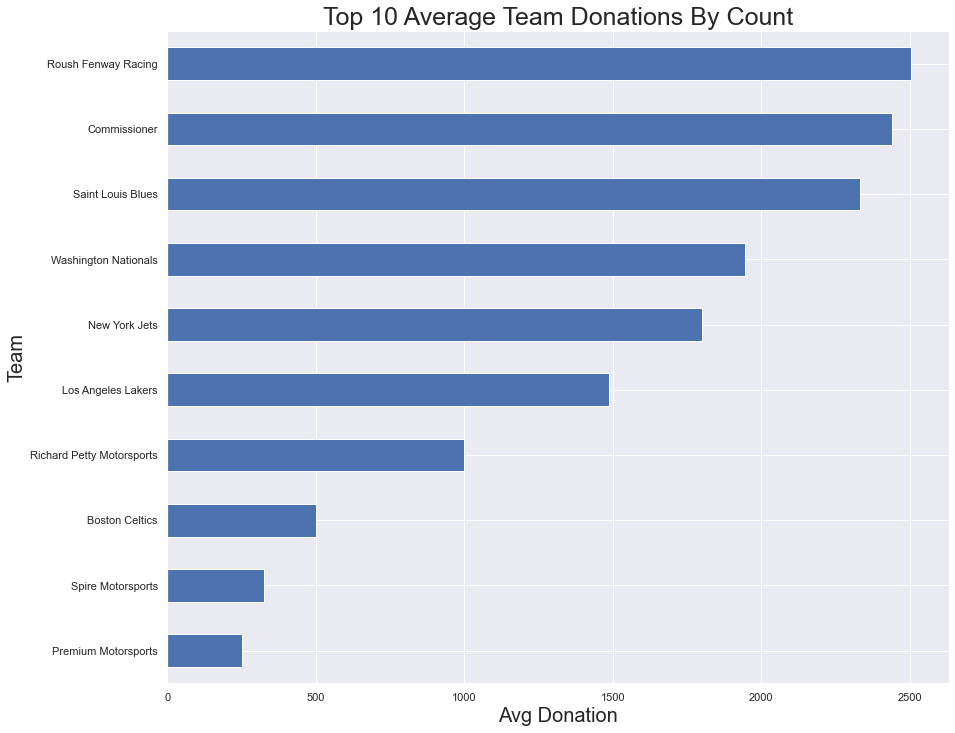

In [21]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(14,12))
avg_team[:10].plot(kind='barh')
plt.xlabel('Avg Donation', fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.title("Top 10 Average Team Donations By Count",fontsize=25);

## **Question:**
    
        Which Party Received most Donations?

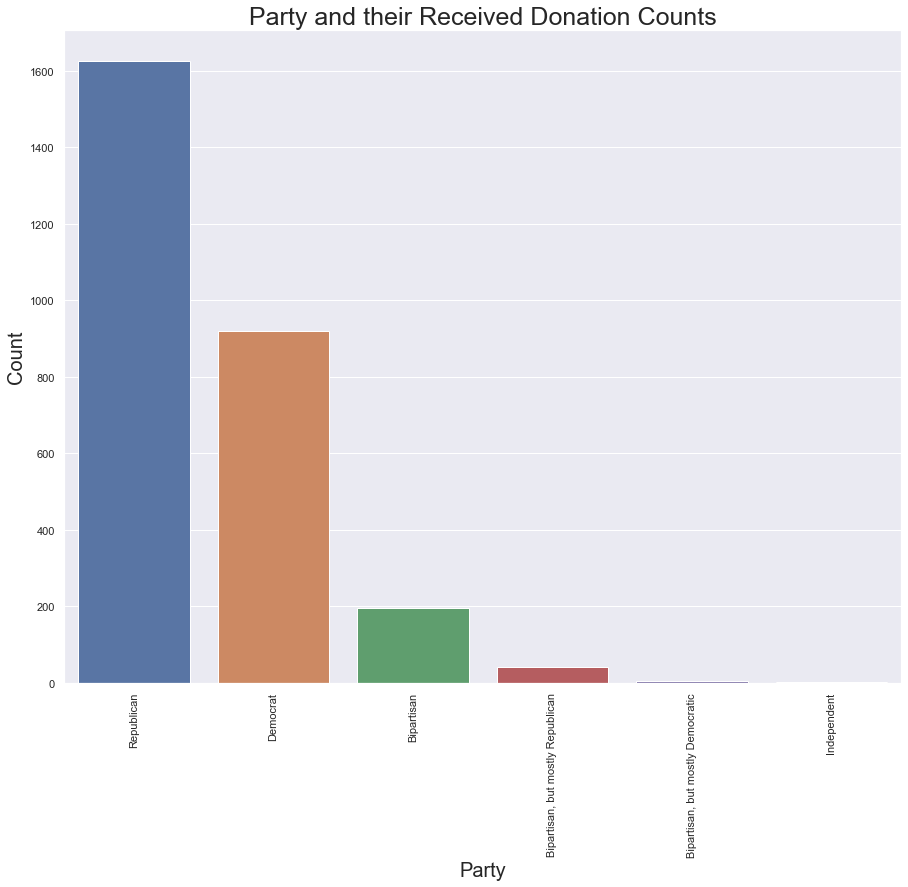

In [22]:
party_df = pd.DataFrame(df.groupby('Party').size().sort_values(ascending=False), columns=["Count"]).reset_index()
fig = plt.figure(figsize=(15,12))
sns.barplot(x='Party', 
            y="Count", 
            ci=None,
            data=party_df)
plt.xlabel('Party',fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("Party and their Received Donation Counts", fontsize=25)
plt.xticks(rotation=90);

## Insight 
 #### From the above graph it is obvious that the most donation were given for the 'Republican'

In [23]:
party_sum_df = df.groupby('Party').sum().sort_values('Amount', ascending=False).reset_index()
party_sum_df

,Party,Amount,Election Year
0,Republican,34246016,3279072
1,Democrat,10113639,1858578
2,Bipartisan,1474699,393502
3,"Bipartisan, but mostly Republican",271093,80726
4,Independent,13500,6052
5,"Bipartisan, but mostly Democratic",10800,10088


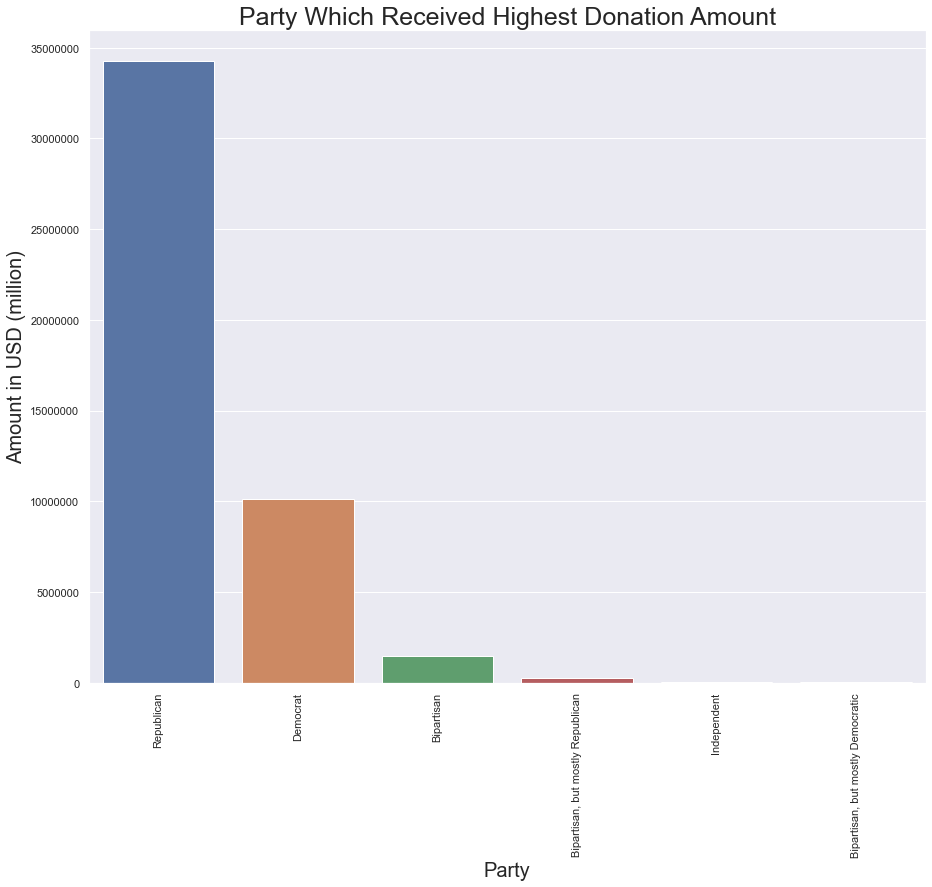

In [25]:
fig = plt.figure(figsize=(15,12))
g = sns.barplot(x='Party', 
            y='Amount', 
            ci=None,
            data=party_sum_df)
plt.xlabel('Party',fontsize=20)
plt.ylabel('Amount in USD (million)', fontsize=20)
g.yaxis.set_major_formatter('{x:.0f}')
plt.title("Party Which Received Highest Donation Amount", fontsize=25)
plt.xticks(rotation=90);

## INSIGHT
 #### From the above graph we can see that the highest amount was received by the 'Republican' and the amount is approximately 34 million

#### That's it for this notebook. If you want you can further add things. If you found this notebook insightful let me know in the comments and also leave an upvote it would really motivate me. I am beginner when it comes to Kaggle and EDA, So, If you find any mistakes or if there is room for further improvement you can mention them in the comments as well.